# TP DFA dans RSA-CRT

## 1/Prise en main de la librarie crypto Python PyCryptodome

In [167]:
#output est le résultat de la signature du message "Hello World!" par le protocole PKCS#1v1.5 utilisant la fonction de hachage 
#SHA-256
output = "r4F09799F6A59081B725599753330B7A2440ABC42606601622FE0C582646E32555303E1062A2989D9B4C265431ADB58DD\nz00\nr85BB33C4BB237A311BC40C1279528FD6BB36F94F534A4D8284A18AB8E5670E734C55A6CCAB5FB5EAE02BA37E2D56648D\nz00\nr7A13BBF17A0E07D607C07CBB72C7A7A77076376E8434CE6E136832DC95DB3D80\nz00"
print(output)

r4F09799F6A59081B725599753330B7A2440ABC42606601622FE0C582646E32555303E1062A2989D9B4C265431ADB58DD
z00
r85BB33C4BB237A311BC40C1279528FD6BB36F94F534A4D8284A18AB8E5670E734C55A6CCAB5FB5EAE02BA37E2D56648D
z00
r7A13BBF17A0E07D607C07CBB72C7A7A77076376E8434CE6E136832DC95DB3D80
z00


In [168]:
#On affiche le résultat en hexadécimal
newout = output.replace("r", "").replace("\nz00","").replace("\n","")
print(newout)

4F09799F6A59081B725599753330B7A2440ABC42606601622FE0C582646E32555303E1062A2989D9B4C265431ADB58DD85BB33C4BB237A311BC40C1279528FD6BB36F94F534A4D8284A18AB8E5670E734C55A6CCAB5FB5EAE02BA37E2D56648D7A13BBF17A0E07D607C07CBB72C7A7A77076376E8434CE6E136832DC95DB3D80


In [169]:
#Conversion en binaire avec binascii
from binascii import unhexlify, hexlify
sig = unhexlify(newout)
print(sig)

b'O\ty\x9fjY\x08\x1brU\x99u30\xb7\xa2D\n\xbcB`f\x01b/\xe0\xc5\x82dn2US\x03\xe1\x06*)\x89\xd9\xb4\xc2eC\x1a\xdbX\xdd\x85\xbb3\xc4\xbb#z1\x1b\xc4\x0c\x12yR\x8f\xd6\xbb6\xf9OSJM\x82\x84\xa1\x8a\xb8\xe5g\x0esLU\xa6\xcc\xab_\xb5\xea\xe0+\xa3~-Vd\x8dz\x13\xbb\xf1z\x0e\x07\xd6\x07\xc0|\xbbr\xc7\xa7\xa7pv7n\x844\xcen\x13h2\xdc\x95\xdb=\x80'


In [170]:
#Chargement des fonctions cryptographiques nécessaires de PyCryptodome
#Chargement du RSA :

from Crypto.PublicKey import RSA
#/!\Ajouter PKCS_v1_5 et SHA256
from Crypto.Hash import SHA256
from Crypto.Signature import PKCS1_v1_5

#Clé publique 
e = 0x10001
N = 0x9292758453063D803DD603D5E777D7888ED1D5BF35786190FA2F23EBC0848AEADDA92CA6C3D80B32C4D109BE0F36D6AE7130B9CED7ACDF54CFC7555AC14EEBAB93A89813FBF3C4F8066D2D800F7C38A81AE31942917403FF4946B0A83D3D3E05EE57C6F5F5606FB5D4BC6CD34EE0801A5E94BB77B07507233A0BC7BAC8F90F79

#Message
m = b"Hello World!"

#Hashage du message avec SHA-256 et affichage du hashé (nommé "hash_object")
hash_object = SHA256.new(data=m)
print(hash_object.hexdigest())

#Construction de la clé publique RSA, et affichage en format PEM (les formats DER et OpenSSH sont aussi disponibles) 
public_key = RSA.construct((N, e))
print(public_key.exportKey('PEM'))

#Vérification de la signature PKCS v1.5 du message
verifier = PKCS1_v1_5.new(public_key)
is_verified = verifier.verify(hash_object, sig)

#Afficher "True" si la signature est vérifiée (utiliser assert)
assert is_verified is True, "La signature n'est pas valide !"
print(is_verified)




7f83b1657ff1fc53b92dc18148a1d65dfc2d4b1fa3d677284addd200126d9069
b'-----BEGIN PUBLIC KEY-----\nMIGfMA0GCSqGSIb3DQEBAQUAA4GNADCBiQKBgQCSknWEUwY9gD3WA9Xnd9eIjtHV\nvzV4YZD6LyPrwISK6t2pLKbD2AsyxNEJvg821q5xMLnO16zfVM/HVVrBTuurk6iY\nE/vzxPgGbS2AD3w4qBrjGUKRdAP/SUawqD09PgXuV8b19WBvtdS8bNNO4IAaXpS7\nd7B1ByM6C8e6yPkPeQIDAQAB\n-----END PUBLIC KEY-----'
True


## 2/Simulation des fautes dans le RSA-CRT

### 2/1/Calcul du RSA-CRT

In [171]:
# Padding du PKCS#1 v1.5
def build_message(m, N):
    sha_id = "3031300d060960864801650304020105000420"
    N_len = (len(bin(N)) - 2 + 7) // 8
    pad_len = (len(hex(N)) - 2) // 2 - 3 - len(m)//2 - len(sha_id)//2
    padded_m = "0001" + "ff" * pad_len + "00" + sha_id + m
    return padded_m

print("Message:       {}".format(m))

# Encode message
hashed_m = hexlify(hash_object.digest()).decode()
padded_m = build_message(hashed_m, N)
msg = int.from_bytes(unhexlify(padded_m), byteorder='big')
print("Padded/hashed: {}".format(padded_m))

Message:       b'Hello World!'
Padded/hashed: 0001ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff003031300d0609608648016503040201050004207f83b1657ff1fc53b92dc18148a1d65dfc2d4b1fa3d677284addd200126d9069


#### Chinese Remainder Theorem (CRT)

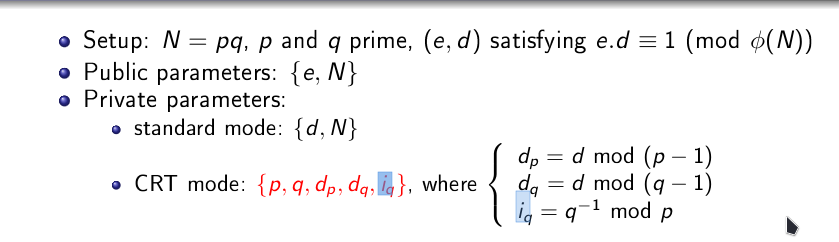

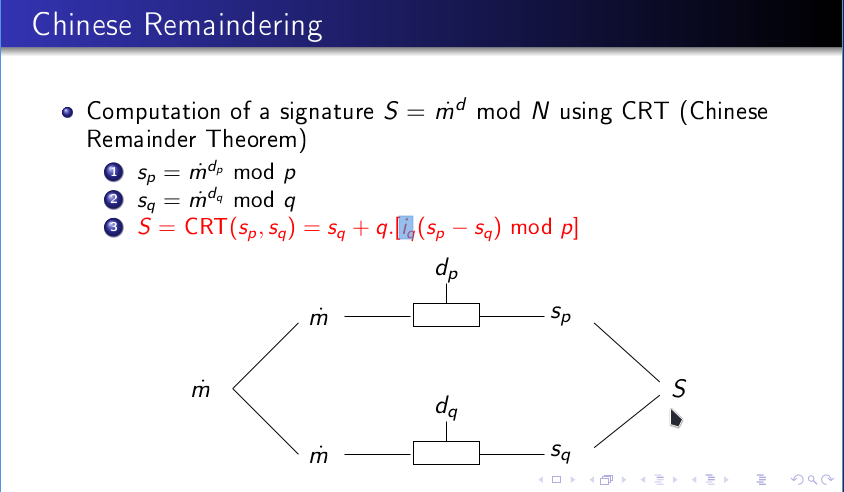

In [172]:
# Signature RSA-CRT
from gmpy2 import invert, powmod, gcd, gcdext

# Paramètres RSA
p = 0xc36d0eb7fcd285223cfb5aaba5bda3d82c01cad19ea484a87ea4377637e75500fcb2005c5c7dd6ec4ac023cda285d796c3d9e75e1efc42488bb4f1d13ac30a57
q = 0xc000df51a7c77ae8d7c7370c1ff55b69e211c2b9e5db1ed0bf61d0d9899620f4910e4168387e3c30aa1e00c339a795088452dd96a9a5ea5d9dca68da636032af

#Calcul de phi et de d
phi = (p - 1) * (q - 1)
d = invert(e, phi)

#Paramètres CRT : calculs de dp, dq, qinv
dp = d % (p - 1)
dq = d % (q - 1)
qinv = invert(q, p)

#Calculs internes du CRT : sp, sq et la signature finale (notée s_crt)
sp = powmod(msg, dp, p)
sq = powmod(msg, dq, q)
h = (qinv * (sp - sq)) % p
s_crt = sq + h * q

#Utiliser la signature précédente correcte, et vérifier que les deux signatures RSA-CRT et non-CRT sont égales
s = int.from_bytes(sig, byteorder='big') 
print("Signature:  {}".format(hex(s)))
print("s == s_crt? {}".format(s == s_crt))

Signature:  0x4f09799f6a59081b725599753330b7a2440abc42606601622fe0c582646e32555303e1062a2989d9b4c265431adb58dd85bb33c4bb237a311bc40c1279528fd6bb36f94f534a4d8284a18ab8e5670e734c55a6ccab5fb5eae02ba37e2d56648d7a13bbf17a0e07d607c07cbb72c7a7a77076376e8434ce6e136832dc95db3d80
s == s_crt? True


### 2/2/Injection de fautes

In [173]:
# Injection de fautes (bit flip) aléatoires dans sp
from random import randint, sample

# Inversion arbitraire de bits dans sp, et calcul de la signature corrompue
num_bits_to_flip = randint(1, 1024)  
indices_to_flip = sample(range(1024), num_bits_to_flip)
sp_corrupted = sp

for index in indices_to_flip:
    sp_corrupted ^= (1 << index)

h = (qinv * (sp_corrupted - sq)) % p
s_corrupted = sq + h * q

is_verified = verifier.verify(hash_object, s_corrupted)
if is_verified:
    print("La signature corrompue est vérifiée.")
else:
    print("La signature corrompue n'est pas vérifiée. Procéder à l'attaque !")

La signature corrompue n'est pas vérifiée. Procéder à l'attaque !


### 2/3/Exploitation des fautes

#### Explication de l'attaque DFA


>Lorsqu'une faute est intentionnellement introduite pendant le processus de signature RSA, nous obtenons une signature corrompue $s_{\text{corrupted}}$. Cette signature est distincte de la signature originale attendue, $s_{\text{crt}}$:

$$ s_{\text{corrupted}} \neq s_{\text{crt}} $$

>La différence entre ces deux signatures est cruciale pour l'attaque. Elle est donnée par:

$$ \text{diff} = |s_{\text{corrupted}} - s_{\text{crt}}| $$

>Si cette différence est un multiple soit de $p$ ou $q$, alors le PGCD entre $\text{diff}$ et $N$ nous donnera soit $p$ soit $q$:

$$ q_{\text{dfa}} = \text{gcd(diff, N)} $$

>Une fois que nous avons $q_{\text{dfa}}$, trouver $p_{\text{dfa}}$ est direct :

$$ p_{\text{dfa}} = \frac{N}{q_{\text{dfa}}} $$

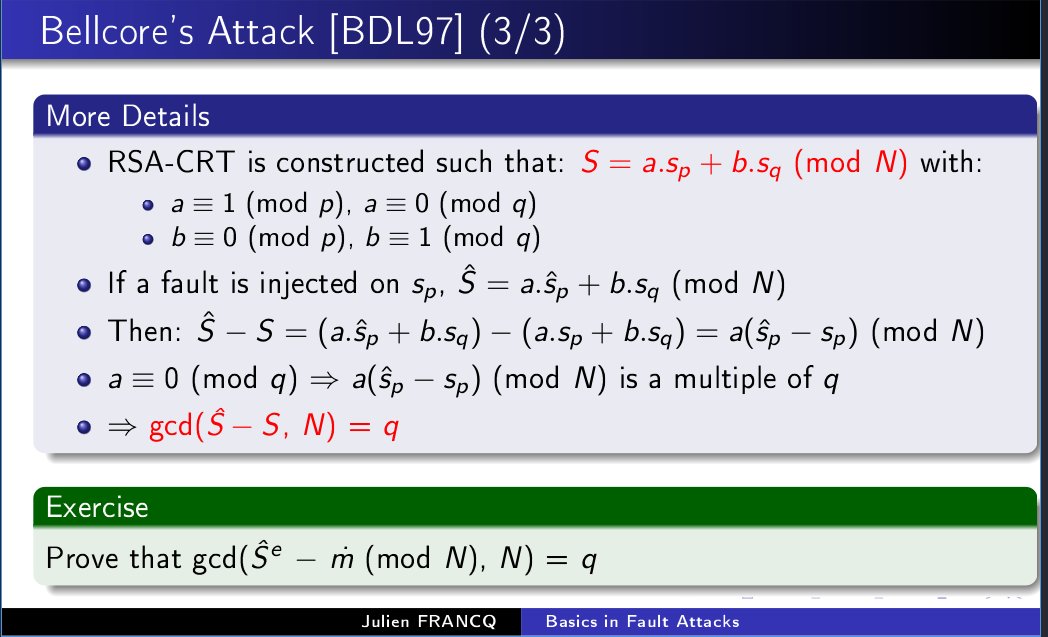


In [174]:
# Variante de l'attaque de Bellcore n°1 : retrouver p et q à partir de la signature correcte et fautée (DFA)
print("\n---------------------Attacking with DFA-----------------")

from math import gcd 
print("\nSignature corrompu :", hex(s_corrupted))
print("\nSignature non corrompu :", hex(s_crt))
print("\nN :", hex(N))

diff = abs(s_corrupted - s_crt)
print("\ndiff :", hex(diff))

q_dfa = gcd(diff, N)

if q_dfa == 1:
    print("q n'a pas été trouvé !")
    exit()

p_dfa = N // q_dfa

print("\np_found =" ,hex(p_dfa))
print("\nq_found =" ,hex(q_dfa))

# Vérifier que p et q sont corrects
assert p_dfa * q_dfa == N, "p et q ne sont pas corrects !"
print("p et q sont corrects !")


---------------------Attacking with DFA-----------------

Signature corrompu : 0x701a5ad38b67c7627d53241a6e849b82e1b4325ad7d94bfdcee740f1a57962a5a777c2a5dad9f587630a959dc047e220f0d69d0ab5882492ec0452f2d855f3bf21106708c66a5fc924cd0e5104f1faab20c00e47af84d09d3e300e9b9d40ad43867b43da1dd2462e8775379cb0e465da7213a4d71723992d38b347133bcceffb

Signature non corrompu : 0x4f09799f6a59081b725599753330b7a2440abc42606601622fe0c582646e32555303e1062a2989d9b4c265431adb58dd85bb33c4bb237a311bc40c1279528fd6bb36f94f534a4d8284a18ab8e5670e734c55a6ccab5fb5eae02ba37e2d56648d7a13bbf17a0e07d607c07cbb72c7a7a77076376e8434ce6e136832dc95db3d80

N : 0x9292758453063d803dd603d5e777d7888ed1d5bf35786190fa2f23ebc0848aeadda92ca6c3d80b32c4d109be0f36d6ae7130b9ced7acdf54cfc7555ac14eebab93a89813fbf3c4f8066d2d800f7c38a81ae31942917403ff4946b0a83d3d3e05ee57c6f5f5606fb5d4bc6cd34ee0801a5e94bb77b07507233a0bc7bac8f90f79

diff : 0x2110e134210ebf470afd8aa53b53e3e09da9761877734a9b9f067b6f410b30505473e19fb0b06badae48305aa56c89436b1b69

#### Explication de l'attaque SFA



>Lors de la signature RSA en utilisant le CRT, les "signatures partielles" $s_p$ et $s_q$ sont générées et combinées pour créer la signature finale. Cette combinaison est réalisée comme suit :

$$ s' = s_q + q \cdot (q_{\text{inv}} \cdot (s_p' - s_q) \mod p) $$

>Si une erreur intervient lors du calcul de $s_p$ ou $s_q$, la signature finale $s'$ sera incorrecte. Lors de la vérification de cette signature en utilisant l'exposant public $e$, le résultat ne correspondra pas au hash paddé du message original $m$ :

$$ (s')^{e} \neq m \mod N $$

>L'attaque est d'étudier la différence $(s')^{e} - m$. Si cette différence est un multiple de $p$ ou $q$, le calcul du PGCD entre cette différence et $N$ dévoilera $p$ ou $q$.

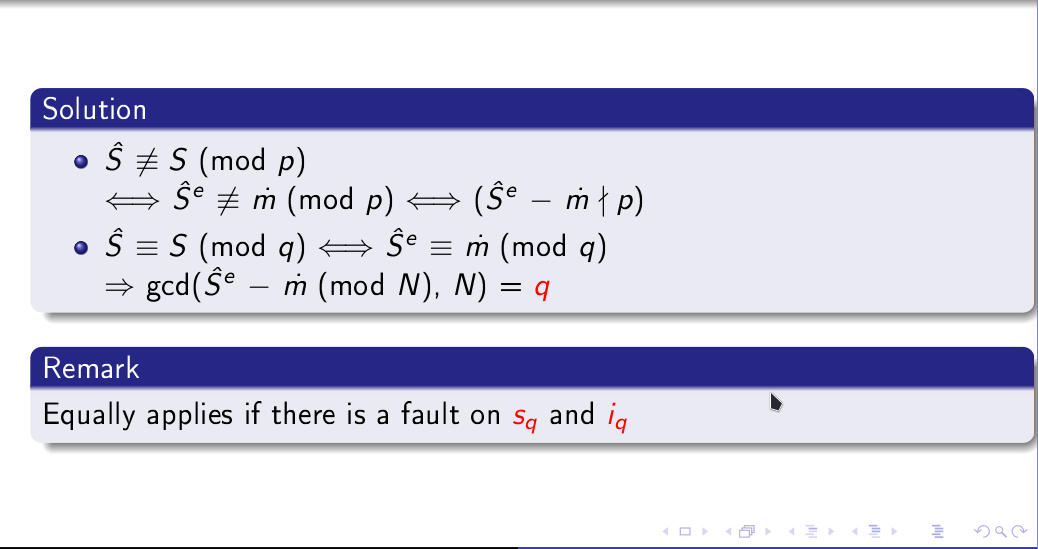

In [175]:
# Variante de l'attaque de Bellcore n°2 : retrouver p et q à partir de seulement une signature fautée (SFA)


print("\n---------------------Attacking with SFA-----------------")

delta = (powmod(s_corrupted, e, N) - msg) % N
print("msg =", hex(msg))
p_sfa = gcd(delta, N)
q_sfa = N // p_sfa

print("\np_sfa =" ,hex(p_sfa))
print("\nq_sfa =" ,hex(q_sfa))
assert p_sfa * q_sfa == N, "p et q ne sont pas corrects !"
print("p et q sont corrects !")



---------------------Attacking with SFA-----------------
msg = 0x1ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff003031300d0609608648016503040201050004207f83b1657ff1fc53b92dc18148a1d65dfc2d4b1fa3d677284addd200126d9069

p_sfa = 0xc000df51a7c77ae8d7c7370c1ff55b69e211c2b9e5db1ed0bf61d0d9899620f4910e4168387e3c30aa1e00c339a795088452dd96a9a5ea5d9dca68da636032af

q_sfa = 0xc36d0eb7fcd285223cfb5aaba5bda3d82c01cad19ea484a87ea4377637e75500fcb2005c5c7dd6ec4ac023cda285d796c3d9e75e1efc42488bb4f1d13ac30a57
p et q sont corrects !


In [176]:
# Calcul de d

phi_dfa = (p_dfa - 1) * (q_dfa - 1)
d_dfa = invert(e, phi_dfa)
phi_sfa = (p_sfa - 1) * (q_sfa - 1)
d_sfa = invert(e, phi_sfa)

print("\nd_dfa =" ,hex(d_dfa))
print("\nd_sfa =" ,hex(d_sfa))



d_dfa = 0x24bf6185468786fdd303083d25e64efc66ca472bc44d253102f8b4a9d3bfa75091386c0077937fe33fa3252d28855837ae1b484a8a9a45f7ee8c0c634f99e8cddf79c5ce07ee72c7f123142198164234cabb724cf78b8173b9f880fc86322407af1fedfdde2beb674ca15f3e81a1521e071513a1e85b5dfa031f21ecae91a34d

d_sfa = 0x24bf6185468786fdd303083d25e64efc66ca472bc44d253102f8b4a9d3bfa75091386c0077937fe33fa3252d28855837ae1b484a8a9a45f7ee8c0c634f99e8cddf79c5ce07ee72c7f123142198164234cabb724cf78b8173b9f880fc86322407af1fedfdde2beb674ca15f3e81a1521e071513a1e85b5dfa031f21ecae91a34d


#### Explication chiffrement + déchiffrement 



>Pour renforcer la sécurité lors du chiffrement, j'ai ajouté un padding conforme à la norme PKCS#1 v1.5. Ce padding sert à prévenir les attaques visant à reconnaître des motifs répétitifs dans un message chiffré avec la clé publique.

>je vais donc déchiffrer le message en utilisant le CRT.

>J'ai accès aux elements de la clé privée, soit $d_{\text{dsa}}$, $p_{\text{dsa}}$, et $q_{\text{dsa}}$, obtenus via des attaques DFA ou SFA, nous pouvons déduire les paramètres CRT : $dp$, $dq$ et $q_{\text{inv}}$.

In [177]:
# Maintenant que l'on a retrouvé tous les paramètres, on peut déchiffrer le message

import os

def pad_for_encryption(message, modulus_length):    
    max_msg_length = modulus_length - 11
    
    if len(message) > max_msg_length:
        raise ValueError(f"Message is too long. Maximum length for given modulus is {max_msg_length} bytes.")
    
    ps_length = modulus_length - len(message) - 3
    ps = os.urandom(ps_length).replace(b'\x00', b'\x01')
    
    return b'\x00\x02' + ps + b'\x00' + message

print("\n---------------------------------------Chiffrement-------------------------------------\n")

modulus_length = (N.bit_length() + 7) // 8
padded_message = pad_for_encryption(m, modulus_length)
print("Padded message:", padded_message)
padded_message_int = int.from_bytes(padded_message, byteorder='big')
ciphertext_int = pow(padded_message_int, e, N)


def remove_padding(padded_message):
    index = padded_message.find(b'\x00', 2)
    if index == -1:
        raise ValueError("Invalid padding structure. 0x00 byte separator not found.")
    
    return padded_message[index+1:]


print("\n---------------------------------------Déchiffrement-------------------------------------\n")

# Paramètres CRT : calculs de dp, dq, qinv
dp_dfa = d_dfa % (p_dfa - 1)
dq_dfa = d_dfa % (q_dfa - 1)
qinv_dfa = invert(q_dfa, p_dfa)

# Decrypt using CRT
m1 = pow(ciphertext_int, dp_dfa, p_dfa)
m2 = pow(ciphertext_int, dq_dfa, q_dfa)
h = (qinv_dfa * (m1 - m2)) % p_dfa
decrypted_message_int = m2 + h * q_dfa

# Convert decrypted integer back to bytes
decrypted_message = int(decrypted_message_int).to_bytes((decrypted_message_int.bit_length() + 7) // 8, byteorder='big')

# Remove padding
depadded_message = remove_padding(decrypted_message)

print("Message original:", m)
print("Message chiffré:", ciphertext_int)
print("Message déchiffré (sans padding):", depadded_message.decode("UTF-8"))



---------------------------------------Chiffrement-------------------------------------

Padded message: b'\x00\x02\x80h\x9dH\xc8\xe2\xaaIM\x92\xfd\x14>\xcaw"\x84\x96\x05<\x04\xfa\xf1D\xbf\xdd\xaf%|\x01\xb2\xbf--\x91\x87\xa3;\xd2\x85\x03\xa6\xab\xbd_\xb7v\x1b6\xfc\x91=^\xc7\x94\x8b4EG{\x19\xc3\xef=3 \x0e\xb8\x9b\xb2i\xf8\xf4%\x1e\xc9\x95\xaa\x04\xc0/\x81c{^\xe4\xec\x17+Hq\xa0\t\xdf\xa7\xba o\x0eo\xbc\x8b\xd3:H\xca\x18\xa1\xa1\t?\xc2\x1e\x00Hello World!'

---------------------------------------Déchiffrement-------------------------------------

Message original: b'Hello World!'
Message chiffré: 29277470868178333986630946168725919178470314830765335147522066144800337079077274919655936554387714217141401591500873758727779041662926355317039087444797146889959502499587785477256301716295070905316342703653344186051557530049921324145547990354345914414610665815945763349858736183951420682422199777499181195274
Message déchiffré (sans padding): Hello World!


#### Explication Vérification signature RSA-CRT avec le message déchiffré


>On récupére le hash du message déchiffré pour le comparer au hash du message dans la signature

>On récupére la clef publique de l'expéditeur pour vérifier la signature

>On retire le padding de la signature en utilisant la méthode basée sur sha_id

>On compare le hash obtenu lors du déchiffrement avec le hash du message dans la signature




In [178]:
print('\n--------------------- Vérification signature RSA-CRT avec le message déchiffré ------------------')


def remove_padding_by_sha_id(padded_message_bytes, sha_id):
    sha_id_index = padded_message_bytes.find(sha_id)
    
    if sha_id_index == -1:
        raise ValueError("Invalid padding structure. SHA ID not found.")
    
    return padded_message_bytes[sha_id_index + len(sha_id):]


depadded_message_hash = SHA256.new(data=depadded_message) 
clef_publique_int = powmod(s_crt, e, N)
clef_publique_bytes = int(clef_publique_int).to_bytes((clef_publique_int.bit_length() + 7) // 8, byteorder='big')


depadded_message_sha_id_method_from_signature = remove_padding_by_sha_id(clef_publique_bytes, bytes.fromhex("3031300d060960864801650304020105000420"))


if hexlify(depadded_message_hash.digest()) == hexlify(depadded_message_sha_id_method_from_signature):
    print("La signature est valide!")
    print("Hash original:", hexlify(depadded_message_hash.digest()))
    print("Hash obtenu:", hexlify(depadded_message_sha_id_method_from_signature))
else:
    print("La signature n'est pas valide!")



--------------------- Vérification signature RSA-CRT avec le message déchiffré ------------------
La signature est valide!
Hash original: b'7f83b1657ff1fc53b92dc18148a1d65dfc2d4b1fa3d677284addd200126d9069'
Hash obtenu: b'7f83b1657ff1fc53b92dc18148a1d65dfc2d4b1fa3d677284addd200126d9069'


# Questions additionnelles :


## 1/Si on faute sq, est-ce que l'attaque réussit ?

>L'attaque de Bellcore sur le RSA-CRT exploite le fait qu'une erreur dans l'une des deux signatures partielles, typiquement $s_p$ ou $s_q$, permet de retrouver un facteur de $N$. La signature RSA utilisant le CRT est formée en combinant $s_p$ et $s_q$ comme suit :

$$ s = s_q + q \cdot (q_{\text{inv}} \cdot (s_p - s_q) \bmod p) $$

>Si une faute est injectée dans $s_q$ au lieu de $s_p$, le principe de l'attaque reste le même. La différence réside dans la façon dont la faute est exploitée, mais l'attaque peut toujours réussir si la faute est correctement injectée et exploitée.

In [179]:
# Injection de fautes (bit flip) aléatoires dans sq

# Inversion arbitraire de bits dans sq, et calcul de la signature corrompue
num_bits_to_flip = randint(1, 1024)  
indices_to_flip = sample(range(1024), num_bits_to_flip)
sq_corrupted = sq

for index in indices_to_flip:
    sq_corrupted ^= (1 << index)

h = (qinv * (sp - sq_corrupted)) % p
s_corrupted = sq_corrupted + h * q

# attaque dfa

diff = abs(s_corrupted - s_crt)
q_dfa = gcd(diff, N)

if q_dfa == 1:
    print("q n'a pas été trouvé !")
    exit()

p_dfa = N // q_dfa

print("\np_found =" ,hex(p_dfa))
print("\nq_found =" ,hex(q_dfa))

# Vérifier que p et q sont corrects
assert p_dfa * q_dfa == N, "p et q ne sont pas corrects !"
print("p et q sont corrects !")


p_found = 0xc000df51a7c77ae8d7c7370c1ff55b69e211c2b9e5db1ed0bf61d0d9899620f4910e4168387e3c30aa1e00c339a795088452dd96a9a5ea5d9dca68da636032af

q_found = 0xc36d0eb7fcd285223cfb5aaba5bda3d82c01cad19ea484a87ea4377637e75500fcb2005c5c7dd6ec4ac023cda285d796c3d9e75e1efc42488bb4f1d13ac30a57
p et q sont corrects !


## 2/Si on faute iq, est-ce que l'attaque réussit ?


## 3/Ecrire le schéma de protection "BOS Algorithm", et tenter de reproduire les fautes qui contournent cette protection. Idem pour la variante "BOS+".


#### BOS Algorithm

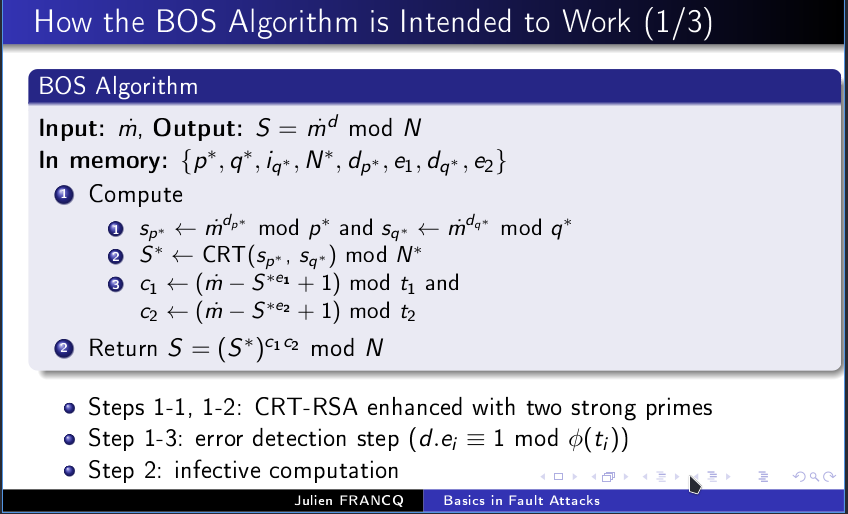

Signature: 0x231ea189eaf3de5f9b93246cacc25dc11368f524d5d871aab1e7c23fc34da07622032799b4633c3b7ad5a523346748d6df17238f6a14d5853a3580898fea647819672357708586d66d0369f2e89bf2c2042b39b0047836f2190ab628e19dc1fd23f68f6e74759538d4812f08a9630e4be644108b8a7cc68275a79e46b20cf3ed


## 4/Même question pour le schéma de Vigilant